In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 120)


In [2]:
data = pd.read_excel('data.xlsx')
country = pd.read_excel('Country-Code.xlsx')


In [3]:
df = pd.merge(data, country, on='Country Code', how='left')

df.shape
df.info()
df.head()
country.info()

df_original = df.copy()
print(f'shape: {df.shape}')

df.isnull().sum()

df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

np.int64(0)

In [4]:
missing = df.isnull().sum().sort_values(ascending = False)
print(f'Missing Values per Column:\n{missing[missing > 0]}')


Missing Values per Column:
Cuisines           9
Restaurant Name    1
dtype: int64


In [5]:
dup_count = df.duplicated().sum()
print(f'Number of exact duplicate rows : {dup_count}')

df = df.drop_duplicates()
  
print (f'Shape after duplicate Removal : {df.shape}')


Number of exact duplicate rows : 0
Shape after duplicate Removal : (9551, 20)


In [7]:
df['City'].value_counts()

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
             ... 
Lincoln         1
Monroe          1
Potrero         1
Weirton         1
Miller          1
Name: count, Length: 141, dtype: int64

In [8]:
df['City'].value_counts().idxmax()
  
city_counts = df['City'].value_counts()
 
max_city = city_counts.idxmax()
max_count = city_counts.max()
print(f"The city with the highest count is {max_city} with {max_count} occurrences.")


The city with the highest count is New Delhi with 5473 occurrences.


In [9]:
df['City'].value_counts().idxmin()
  
min_city = city_counts.idxmin()
min_count = city_counts.min()
print(f"The city with the lowest count is {min_city} with {min_count} occurrence(s).")


The city with the lowest count is Phillip Island with 1 occurrence(s).


In [10]:
top_franchise = df.groupby('Restaurant Name')['Country'].nunique().sort_values(ascending=False).head(1)
franchise_name = top_franchise.index[0]
country_count = top_franchise.iloc[0]
print(f"Top franchise by national presence: {franchise_name} in {country_count} countries")


Top franchise by national presence: Hard Rock Cafe in 3 countries


In [11]:
df['Has Table booking'].value_counts(normalize=True) * 100
percentage = df['Has Table booking'].value_counts(normalize=True) * 100
print(percentage)
  
table_booking_counts = df['Has Table booking'].value_counts()
ratio = table_booking_counts / table_booking_counts.sum()
print("Counts of table booking options:")
print(table_booking_counts)
print("\nRatio of table booking options:")
print(ratio)


Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64
Counts of table booking options:
Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

Ratio of table booking options:
Has Table booking
No     0.878756
Yes    0.121244
Name: count, dtype: float64


In [12]:
df['Has Online delivery'].value_counts(normalize=True) * 100

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

In [13]:
delivery_votes = df[df['Has Online delivery'] == 'Yes']['Votes'].sum()
no_delivery_votes = df[df['Has Online delivery'] == 'No']['Votes'].sum()
vote_difference = delivery_votes - no_delivery_votes

print(f"Difference in votes (Delivery - No Delivery): {vote_difference}")


Difference in votes (Delivery - No Delivery): -462817


In [14]:
cuisines = df['Cuisines'].str.split(', ').explode()
cuisines.value_counts().head(10)


Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

In [15]:
df['Cuisine Count'] = df['Cuisines'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
max_cuisines = df['Cuisine Count'].max()
min_cuisines = df['Cuisine Count'].min()

print(f"Maximum cuisines served by a restaurant: {max_cuisines}")
print(f"Minimum cuisines served by a restaurant: {min_cuisines}")


Maximum cuisines served by a restaurant: 8
Minimum cuisines served by a restaurant: 0


In [16]:
df_exploded = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')
cuisine_counts = df_exploded.groupby(['City', 'Cuisines']).size().reset_index(name='Count')
top_cuisine_per_city = cuisine_counts.loc[cuisine_counts.groupby('City')['Count'].idxmax()]
print(top_cuisine_per_city[['City', 'Cuisines', 'Count']])


                 City      Cuisines  Count
11          Abu Dhabi        Indian      7
37               Agra  North Indian     15
48          Ahmedabad   Continental     12
62             Albany      American      4
91          Allahabad  North Indian     12
...               ...           ...    ...
1815          Weirton        Burger      1
1820  Wellington City          Cafe      9
1835   Winchester Bay        Burger      1
1838          Yorkton         Asian      1
1842        €¡stanbul          Cafe      4

[140 rows x 3 columns]


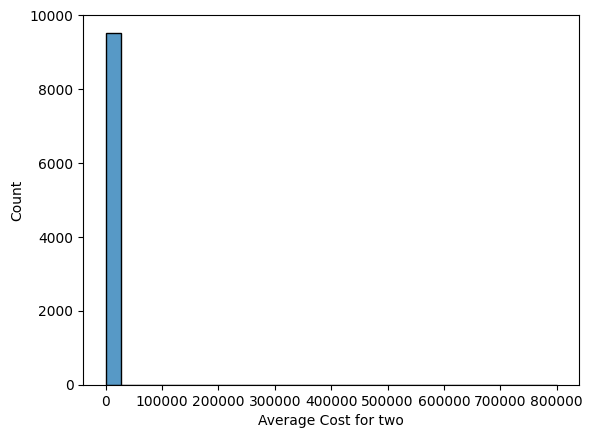

In [17]:
sns.histplot(df['Average Cost for two'], bins=30)
plt.show()


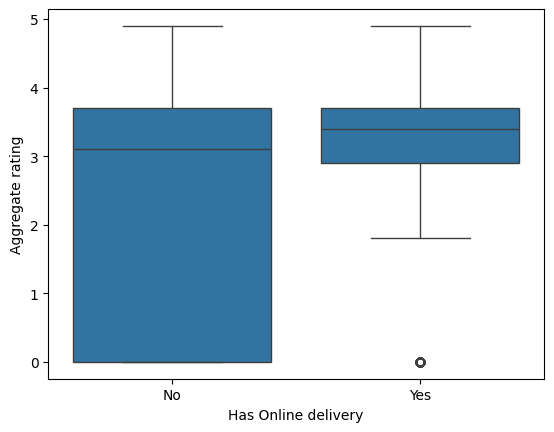

In [18]:
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df)
plt.show() 


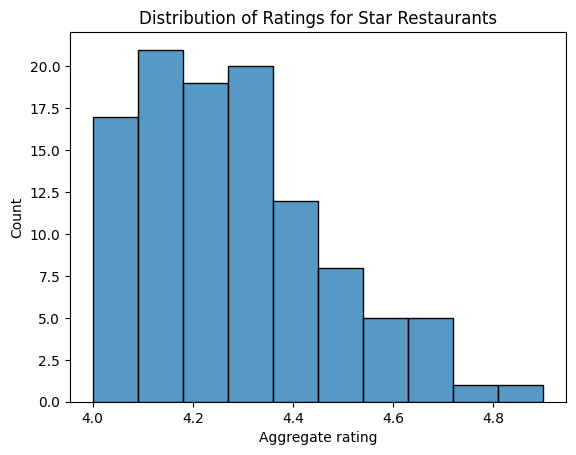

In [21]:
star_restaurants = df[(df['Aggregate rating'] >= 4.0) &
                      (df['Votes'] >= 500) &
                      (df['Has Online delivery'] == 'Yes')]
sns.histplot(star_restaurants['Aggregate rating'], bins=10)
plt.title("Distribution of Ratings for Star Restaurants")
plt.show()


In [22]:
df.to_csv('/Users/manne/Documents/Marketing_Project.csv', index=False)